In [1]:
from qiskit.algorithms import VQE
from qiskit.algorithms.optimizers import SLSQP 
from qiskit.circuit.library import TwoLocal, RealAmplitudes
import numpy as np
from qiskit import Aer
from qiskit.utils import QuantumInstance
import random 

%matplotlib inline

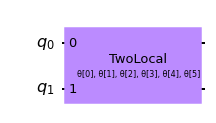

In [2]:
num_qubits = 2
seed = 500
ansatz = TwoLocal(num_qubits,'ry', 'cz','full',reps=2, insert_barriers=True)
opt = SLSQP(maxiter=1000)
qi = QuantumInstance(Aer.get_backend('statevector_simulator'), seed_transpiler=seed, seed_simulator=seed)
vqe = VQE(ansatz, optimizer=opt , quantum_instance=qi)  

ansatz.draw(output='mpl')
#print(ansatz)

In [4]:
from qiskit.opflow import X, Z, I, Y

H2_op = (-1 * I ^ I) + (1.5 * X ^ I) + (3.0 * I ^ X) + (-1.5 * Y ^ Y) + (1.5 * X ^ X) + (1.5 * X ^ Z) 

result = vqe.compute_minimum_eigenvalue(H2_op)
print(result)

{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 65,
    'eigenstate': array([ 0.74936974+0.j, -0.50596536+0.j, -0.30197387+0.j, -0.3020858 +0.j]),
    'eigenvalue': (-5.4435828936177355+0j),
    'optimal_parameters': {   ParameterVectorElement(θ[3]): 0.17085698057570942,
                              ParameterVectorElement(θ[4]): -4.693868401382227,
                              ParameterVectorElement(θ[1]): -5.21067697400562,
                              ParameterVectorElement(θ[0]): 1.073297405190078,
                              ParameterVectorElement(θ[2]): 2.0036162452378354,
                              ParameterVectorElement(θ[5]): -5.599697522327647},
    'optimal_point': array([ 1.07329741, -5.21067697,  2.00361625,  0.17085698, -4.6938684 ,
       -5.59969752]),
    'optimal_value': -5.4435828936177355,
    'optimizer_evals': None,
    'optimizer_time': 0.39223694801330566}


In [86]:
g0 = -0.4804
g1 = +0.3435
g2 = -0.4347
g3 = +0.5716
g4 = +0.0910
g5 = +0.0910 

H_mol= (g0*I^I)+(g1*I^Z)+(g2*Z^I)+(g3*Z^Z)+(g4*Y^Y)+(g5*X^X) 
result2 = vqe.compute_minimum_eigenvalue(H_mol)
print(result2)

{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 50,
    'eigenstate': array([ 9.41390727e-06+0.j,  9.93399274e-01+0.j, -1.14707796e-01+0.j,
       -5.62736454e-05+0.j]),
    'eigenvalue': (-1.851199104860918+0j),
    'optimal_parameters': {   ParameterVectorElement(θ[1]): 3.852167543527636,
                              ParameterVectorElement(θ[2]): 5.454746965784284,
                              ParameterVectorElement(θ[3]): 2.8618977953636584,
                              ParameterVectorElement(θ[4]): -1.3388470764906713,
                              ParameterVectorElement(θ[5]): 5.683742430785892,
                              ParameterVectorElement(θ[0]): 1.1384085963300898},
    'optimal_point': array([ 1.1384086 ,  3.85216754,  5.45474697,  2.8618978 , -1.33884708,
        5.68374243]),
    'optimal_value': -1.851199104860918,
    'optimizer_evals': None,
    'optimizer_time': 0.22699952125549316}


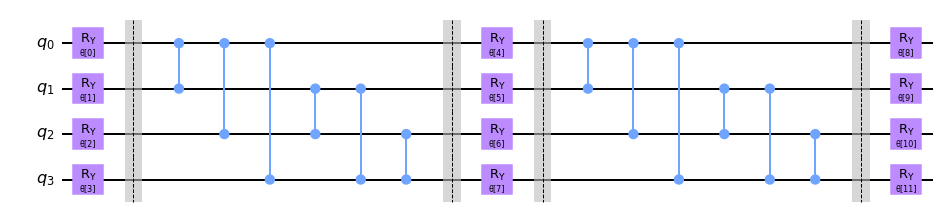

In [71]:
num_qubits = 4
seed = 1000
ansatz = TwoLocal(num_qubits,'ry', 'cz','full',reps=2, insert_barriers=True)
initial=[random.uniform(2*np.pi, 3*np.pi) for i in range(12)]
#ansatz = RealAmplitudes(4, entanglement='full', reps=2, insert_barriers=True)
opt = SLSQP(maxiter=1000)
qi = QuantumInstance(Aer.get_backend('statevector_simulator'), shots=5000, seed_transpiler=seed, seed_simulator=seed)
vqe = VQE(ansatz, optimizer=opt , quantum_instance=qi, initial_point=initial)  

ansatz.decompose().draw(output='mpl')

In [72]:
from qiskit.opflow import X, Z, I, Y 

Ham= 4*(I^I^I^I)-4*(Z^I^I^I)-(I^Z^I^I)-(5/2)*(I^I^Z^I)-(5/2)*(I^I^I^Z)+(6/4)*(Z^Z^I^I)+(6/4)*(Z^I^I^Z)+(6/4)*(I^I^Z^Z)+(6/4)*(Z^I^Z^I) 

result2 = vqe.compute_minimum_eigenvalue(Ham)
print(result2)


{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 319,
    'eigenstate': array([ 9.84663472e-05+0.j, -2.49657555e-04+0.j, -7.82863153e-04+0.j,
        4.18888534e-04+0.j, -2.49045806e-05+0.j,  9.99799419e-01+0.j,
       -2.00013544e-02+0.j,  2.82091711e-05+0.j,  4.09553698e-04+0.j,
        1.15796488e-04+0.j, -7.49948538e-05-0.j, -1.32603549e-05+0.j,
       -1.26057961e-04+0.j, -4.96983089e-05+0.j,  2.92607884e-05+0.j,
        8.86407420e-07+0.j]),
    'eigenvalue': (-1.9999978311304958+0j),
    'optimal_parameters': {   ParameterVectorElement(θ[3]): 6.27760424341657,
                              ParameterVectorElement(θ[5]): 9.427066223544816,
                              ParameterVectorElement(θ[6]): 9.61506187845416,
                              ParameterVectorElement(θ[7]): 9.423539497781672,
                              ParameterVectorElement(θ[10]): 8.659382890874912,
                              ParameterVectorElement(θ[2]): 8.684528443929803,
               

## Some Hamiltonians to solve QUBO problems 

In [17]:
from qiskit.opflow import Z, I  

Ham_1= (3/2)*(I ^ I) - (1/2)*(Z ^ I) - (I ^ Z) 
Ham_2= (1/2)*(I ^ I) + (Z ^ I) + (1/2)*(I ^ Z) - 2*(Z ^ Z)
Ham_3= (7/4)*(I ^ I) -(5/4)*(Z ^ I) -(5/4)*(I ^ Z) + (3/4)*(Z ^ Z)

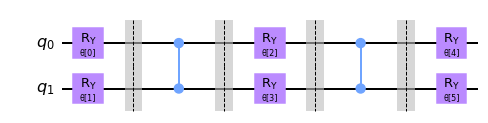

In [12]:
num_qubits = 2
seed = 1000
ansatz = TwoLocal(num_qubits,'ry', 'cz','full',reps=2, insert_barriers=True)
initial=[random.uniform(2*np.pi, 3*np.pi) for i in range(6)]
#ansatz = RealAmplitudes(4, entanglement='full', reps=2, insert_barriers=True)
opt = SLSQP(maxiter=1000)
qi = QuantumInstance(Aer.get_backend('statevector_simulator'), shots=5000, seed_transpiler=seed, seed_simulator=seed)
vqe = VQE(ansatz, optimizer=opt , quantum_instance=qi, initial_point=initial)  

ansatz.decompose().draw(output='mpl')

In [16]:
result_Ham_1 = vqe.compute_minimum_eigenvalue(Ham_1)
print(result_Ham_1)

{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 57,
    'eigenstate': array([-9.99999998e-01+0.j,  7.93292843e-06+0.j,  6.08203639e-05+0.j,
        1.36476436e-05+0.j]),
    'eigenvalue': (4.383753896e-09+0j),
    'optimal_parameters': {   ParameterVectorElement(θ[4]): 8.385467695811846,
                              ParameterVectorElement(θ[0]): 6.901626705169905,
                              ParameterVectorElement(θ[1]): 7.07200892062218,
                              ParameterVectorElement(θ[2]): 7.978828081832021,
                              ParameterVectorElement(θ[3]): 8.469140030744837,
                              ParameterVectorElement(θ[5]): 8.927188285633383},
    'optimal_point': array([6.90162671, 7.07200892, 7.97882808, 8.46914003, 8.3854677 ,
       8.92718829]),
    'optimal_value': 4.383753896e-09,
    'optimizer_evals': None,
    'optimizer_time': 0.39636731147766113}


In [18]:
result_Ham_2 = vqe.compute_minimum_eigenvalue(Ham_2)
print(result_Ham_2)

{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 52,
    'eigenstate': array([ 2.75429587e-04+0.j,  2.97221070e-05+0.j,  1.43803224e-04+0.j,
       -9.99999951e-01+0.j]),
    'eigenvalue': (-2.9999996637183686+0j),
    'optimal_parameters': {   ParameterVectorElement(θ[4]): 7.062502605863906,
                              ParameterVectorElement(θ[0]): 7.430674629771328,
                              ParameterVectorElement(θ[1]): 6.747010079131714,
                              ParameterVectorElement(θ[2]): 8.997768451657222,
                              ParameterVectorElement(θ[3]): 9.6924277474749,
                              ParameterVectorElement(θ[5]): 6.9032008362292165},
    'optimal_point': array([7.43067463, 6.74701008, 8.99776845, 9.69242775, 7.06250261,
       6.90320084]),
    'optimal_value': -2.9999996637183686,
    'optimizer_evals': None,
    'optimizer_time': 0.30664825439453125}


In [8]:
result_Ham_3 = vqe.compute_minimum_eigenvalue(Ham_3)
print(result_Ham_3)

{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 42,
    'eigenstate': array([-9.99999817e-01+0.j,  3.27097968e-04+0.j, -5.03655684e-04-0.j,
       -6.96624327e-05+0.j]),
    'eigenvalue': (3.84926401621e-07+0j),
    'optimal_parameters': {   ParameterVectorElement(θ[5]): 8.295358013229722,
                              ParameterVectorElement(θ[0]): 7.236940032588425,
                              ParameterVectorElement(θ[1]): 7.908154487604366,
                              ParameterVectorElement(θ[2]): 7.0820920654226756,
                              ParameterVectorElement(θ[3]): 8.50631108305926,
                              ParameterVectorElement(θ[4]): 7.403032473585277},
    'optimal_point': array([7.23694003, 7.90815449, 7.08209207, 8.50631108, 7.40303247,
       8.29535801]),
    'optimal_value': 3.84926401621e-07,
    'optimizer_evals': None,
    'optimizer_time': 0.33675169944763184}
